In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os
import csv

In [2]:
# File to Load (Remember to Change These if my path is different)
intakes2_data_load = "Data/Austin_Animal_Center_Intakes2.csv"
outcomes2_data_load = "Data/Austin_Animal_Center_Outcomes2.csv"

intakes2_data = pd.read_csv(intakes2_data_load)
outcomes2_data = pd.read_csv(outcomes2_data_load)

In [3]:
outcomes2_data["Animal ID"].astype(str)
intakes2_data["Animal ID"].astype(str)

0         A786884
1         A706918
2         A724273
3         A665644
4         A682524
           ...   
123891    A829661
123892    A829659
123893    A829664
123894    A829629
123895    A828907
Name: Animal ID, Length: 123896, dtype: object

In [4]:
outcomes2_data["Animal ID"] = outcomes2_data["Animal ID"].map(lambda x: str(x)[1:])
intakes2_data["Animal ID"] = intakes2_data["Animal ID"].map(lambda x: str(x)[1:])

In [5]:
outcomes2_data = outcomes2_data.drop(columns=['Name', 'MonthYear', 'Animal Type','Breed','Color'])
intakes2_data = intakes2_data.drop(columns=['MonthYear'])

In [6]:
outcomes2_data = outcomes2_data.sort_values(by=["Animal ID", "DateTime"], ascending=False)
intakes2_data = intakes2_data.sort_values(by=["Animal ID", "DateTime"], ascending=False)

In [7]:
outcomes2_data = outcomes2_data.drop_duplicates(["Animal ID"], keep= 'first')
intakes2_data = intakes2_data.drop_duplicates(["Animal ID"], keep= 'first')

In [8]:
outcomes2_data.rename(columns = {'DateTime':'DateTime_out'}, inplace = True)

In [9]:
# Combine the data into a single dataset.  
allanimal2_data = pd.merge(intakes2_data,outcomes2_data, how='left', on=["Animal ID","Animal ID"])
allanimal2_data.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
0,829664,NaN,2/20/2021 9:34,Del Valle in Austin (TX),Stray,Injured,Dog,Intact Male,2 years,Labrador Retriever,Brown/Black,NaN,NaN,NaN,NaN,NaN,NaN
1,829662,NaN,2/20/2021 8:17,406 Chaparral Road in Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Rottweiler,Black/Tan,NaN,NaN,NaN,NaN,NaN,NaN
2,829661,NaN,2/19/2021 17:23,9604 Carson Creek in Austin (TX),Stray,Normal,Cat,Intact Male,1 year,Domestic Shorthair,Orange Tabby,NaN,NaN,NaN,NaN,NaN,NaN
3,829660,NaN,2/19/2021 16:43,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Carolina Dog,Yellow Brindle/White,NaN,NaN,NaN,NaN,NaN,NaN
4,829659,NaN,2/19/2021 16:43,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Labrador Retriever,Black/White,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
allanimal2_data["DateTime"]= pd.to_datetime(allanimal2_data["DateTime"])

In [11]:
allanimal2_data["DateTime_out"]= pd.to_datetime(allanimal2_data["DateTime_out"])

In [12]:
allanimal2_data["shelter_time"] = allanimal2_data["DateTime_out"] - allanimal2_data["DateTime"]

In [13]:
allanimal2_data.loc[allanimal2_data['shelter_time'] > pd.Timedelta(0)]

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time
34,829498,NaN,2021-02-12 09:41:00,Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat,Brown,2021-02-14 10:02:00,2/12/2020,Euthanasia,Rabies Risk,Unknown,1 year,2 days 00:21:00
40,829478,*Jasmine,2021-02-11 12:02:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,2 years,Chihuahua Shorthair Mix,Black/Brown,2021-02-12 14:30:00,2/11/2019,Transfer,Partner,Intact Female,2 years,1 days 02:28:00
41,829477,*Jackson,2021-02-11 12:02:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,2 years,Miniature Schnauzer Mix,Buff,2021-02-12 14:30:00,2/11/2019,Transfer,Partner,Intact Male,2 years,1 days 02:28:00
42,829476,*Juliet,2021-02-11 12:02:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,3 years,Chihuahua Shorthair Mix,Black,2021-02-12 14:30:00,2/11/2018,Transfer,Partner,Intact Female,3 years,1 days 02:28:00
43,829475,*Jenni,2021-02-11 12:02:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,1 year,Miniature Schnauzer Mix,Black/Gray,2021-02-12 14:29:00,2/11/2020,Transfer,Partner,Intact Female,1 year,1 days 02:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110722,163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),Stray,Normal,Dog,Intact Female,15 years,Miniature Schnauzer Mix,Black/Gray,2014-11-14 19:28:00,10/19/1999,Return to Owner,NaN,Intact Female,15 years,0 days 04:17:00
110723,141142,Bettie,2013-11-16 14:46:00,Austin (TX),Stray,Aged,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,2013-11-17 11:40:00,6/1/1998,Return to Owner,NaN,Spayed Female,15 years,0 days 20:54:00
110724,134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,10/16/1997,Return to Owner,NaN,Neutered Male,16 years,0 days 02:52:00
110725,047759,Oreo,2014-04-02 15:55:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,4/2/2004,Transfer,Partner,Neutered Male,10 years,4 days 23:17:00


In [14]:
allanimal2_data["shelter_time"] = allanimal2_data["shelter_time"].astype(str)

In [15]:
allanimal2_data.dtypes

Animal ID                   object
Name                        object
DateTime            datetime64[ns]
Found Location              object
Intake Type                 object
Intake Condition            object
Animal Type                 object
Sex upon Intake             object
Age upon Intake             object
Breed                       object
Color                       object
DateTime_out        datetime64[ns]
Date of Birth               object
Outcome Type                object
Outcome Subtype             object
Sex upon Outcome            object
Age upon Outcome            object
shelter_time                object
dtype: object

In [16]:
allanimal2_data["shelter_days"] = allanimal2_data["shelter_time"].str[:2]
allanimal2_data

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days
0,829664,NaN,2021-02-20 09:34:00,Del Valle in Austin (TX),Stray,Injured,Dog,Intact Male,2 years,Labrador Retriever,Brown/Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,Na
1,829662,NaN,2021-02-20 08:17:00,406 Chaparral Road in Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Rottweiler,Black/Tan,NaT,NaN,NaN,NaN,NaN,NaN,NaT,Na
2,829661,NaN,2021-02-19 17:23:00,9604 Carson Creek in Austin (TX),Stray,Normal,Cat,Intact Male,1 year,Domestic Shorthair,Orange Tabby,NaT,NaN,NaN,NaN,NaN,NaN,NaT,Na
3,829660,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Carolina Dog,Yellow Brindle/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,Na
4,829659,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Labrador Retriever,Black/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110722,163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),Stray,Normal,Dog,Intact Female,15 years,Miniature Schnauzer Mix,Black/Gray,2014-11-14 19:28:00,10/19/1999,Return to Owner,NaN,Intact Female,15 years,0 days 04:17:00,0
110723,141142,Bettie,2013-11-16 14:46:00,Austin (TX),Stray,Aged,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,2013-11-17 11:40:00,6/1/1998,Return to Owner,NaN,Spayed Female,15 years,0 days 20:54:00,0
110724,134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,10/16/1997,Return to Owner,NaN,Neutered Male,16 years,0 days 02:52:00,0
110725,047759,Oreo,2014-04-02 15:55:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,4/2/2004,Transfer,Partner,Neutered Male,10 years,4 days 23:17:00,4


In [17]:
allanimal2_data["shelter_days"] = allanimal2_data["shelter_days"].replace("Na", 0.1)
allanimal2_data

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days
0,829664,NaN,2021-02-20 09:34:00,Del Valle in Austin (TX),Stray,Injured,Dog,Intact Male,2 years,Labrador Retriever,Brown/Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0.1
1,829662,NaN,2021-02-20 08:17:00,406 Chaparral Road in Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Rottweiler,Black/Tan,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0.1
2,829661,NaN,2021-02-19 17:23:00,9604 Carson Creek in Austin (TX),Stray,Normal,Cat,Intact Male,1 year,Domestic Shorthair,Orange Tabby,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0.1
3,829660,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Carolina Dog,Yellow Brindle/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0.1
4,829659,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Labrador Retriever,Black/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110722,163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),Stray,Normal,Dog,Intact Female,15 years,Miniature Schnauzer Mix,Black/Gray,2014-11-14 19:28:00,10/19/1999,Return to Owner,NaN,Intact Female,15 years,0 days 04:17:00,0
110723,141142,Bettie,2013-11-16 14:46:00,Austin (TX),Stray,Aged,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,2013-11-17 11:40:00,6/1/1998,Return to Owner,NaN,Spayed Female,15 years,0 days 20:54:00,0
110724,134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,10/16/1997,Return to Owner,NaN,Neutered Male,16 years,0 days 02:52:00,0
110725,047759,Oreo,2014-04-02 15:55:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,4/2/2004,Transfer,Partner,Neutered Male,10 years,4 days 23:17:00,4


In [18]:
allanimal2_data["shelter_days"] = allanimal2_data["shelter_days"].astype(int)

In [19]:
allanimal2_data.loc[allanimal2_data["shelter_days"].isin(range(0,1)), "Adopt Rating"] = "AA"
allanimal2_data.loc[allanimal2_data["shelter_days"].isin(range(2,5)), "Adopt Rating"] = "A"
allanimal2_data.loc[allanimal2_data["shelter_days"].isin(range(6,14)), "Adopt Rating"] = "B"
allanimal2_data.loc[allanimal2_data["shelter_days"].isin(range(15,30)), "Adopt Rating"] = "C"
allanimal2_data.loc[allanimal2_data["shelter_days"].isin(range(31,90)), "Adopt Rating"] = "D"
allanimal2_data.loc[allanimal2_data["shelter_days"].isin(range(91,1000)), "Adopt Rating"] = "F"
allanimal2_data

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating
0,829664,NaN,2021-02-20 09:34:00,Del Valle in Austin (TX),Stray,Injured,Dog,Intact Male,2 years,Labrador Retriever,Brown/Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,AA
1,829662,NaN,2021-02-20 08:17:00,406 Chaparral Road in Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Rottweiler,Black/Tan,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,AA
2,829661,NaN,2021-02-19 17:23:00,9604 Carson Creek in Austin (TX),Stray,Normal,Cat,Intact Male,1 year,Domestic Shorthair,Orange Tabby,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,AA
3,829660,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Carolina Dog,Yellow Brindle/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,AA
4,829659,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Labrador Retriever,Black/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110722,163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),Stray,Normal,Dog,Intact Female,15 years,Miniature Schnauzer Mix,Black/Gray,2014-11-14 19:28:00,10/19/1999,Return to Owner,NaN,Intact Female,15 years,0 days 04:17:00,0,AA
110723,141142,Bettie,2013-11-16 14:46:00,Austin (TX),Stray,Aged,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,2013-11-17 11:40:00,6/1/1998,Return to Owner,NaN,Spayed Female,15 years,0 days 20:54:00,0,AA
110724,134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,10/16/1997,Return to Owner,NaN,Neutered Male,16 years,0 days 02:52:00,0,AA
110725,047759,Oreo,2014-04-02 15:55:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,4/2/2004,Transfer,Partner,Neutered Male,10 years,4 days 23:17:00,4,A


In [20]:
allanimal2_data.loc[allanimal2_data["Outcome Type"]!="Adoption", "Adopt Rating"] = "Not Adopted"
allanimal2_data

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating
0,829664,NaN,2021-02-20 09:34:00,Del Valle in Austin (TX),Stray,Injured,Dog,Intact Male,2 years,Labrador Retriever,Brown/Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,Not Adopted
1,829662,NaN,2021-02-20 08:17:00,406 Chaparral Road in Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Rottweiler,Black/Tan,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,Not Adopted
2,829661,NaN,2021-02-19 17:23:00,9604 Carson Creek in Austin (TX),Stray,Normal,Cat,Intact Male,1 year,Domestic Shorthair,Orange Tabby,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,Not Adopted
3,829660,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Carolina Dog,Yellow Brindle/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,Not Adopted
4,829659,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Labrador Retriever,Black/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,0,Not Adopted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110722,163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),Stray,Normal,Dog,Intact Female,15 years,Miniature Schnauzer Mix,Black/Gray,2014-11-14 19:28:00,10/19/1999,Return to Owner,NaN,Intact Female,15 years,0 days 04:17:00,0,Not Adopted
110723,141142,Bettie,2013-11-16 14:46:00,Austin (TX),Stray,Aged,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,2013-11-17 11:40:00,6/1/1998,Return to Owner,NaN,Spayed Female,15 years,0 days 20:54:00,0,Not Adopted
110724,134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,10/16/1997,Return to Owner,NaN,Neutered Male,16 years,0 days 02:52:00,0,Not Adopted
110725,047759,Oreo,2014-04-02 15:55:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,4/2/2004,Transfer,Partner,Neutered Male,10 years,4 days 23:17:00,4,Not Adopted


In [21]:
allanimal2_data.loc[allanimal2_data["shelter_time"]=="NaT", "shelter_days"] = "New intake"
allanimal2_data

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating
0,829664,NaN,2021-02-20 09:34:00,Del Valle in Austin (TX),Stray,Injured,Dog,Intact Male,2 years,Labrador Retriever,Brown/Black,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
1,829662,NaN,2021-02-20 08:17:00,406 Chaparral Road in Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Rottweiler,Black/Tan,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
2,829661,NaN,2021-02-19 17:23:00,9604 Carson Creek in Austin (TX),Stray,Normal,Cat,Intact Male,1 year,Domestic Shorthair,Orange Tabby,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
3,829660,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Carolina Dog,Yellow Brindle/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
4,829659,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Labrador Retriever,Black/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110722,163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),Stray,Normal,Dog,Intact Female,15 years,Miniature Schnauzer Mix,Black/Gray,2014-11-14 19:28:00,10/19/1999,Return to Owner,NaN,Intact Female,15 years,0 days 04:17:00,0,Not Adopted
110723,141142,Bettie,2013-11-16 14:46:00,Austin (TX),Stray,Aged,Dog,Spayed Female,15 years,Labrador Retriever/Pit Bull,Black/White,2013-11-17 11:40:00,6/1/1998,Return to Owner,NaN,Spayed Female,15 years,0 days 20:54:00,0,Not Adopted
110724,134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16 years,Shetland Sheepdog,Brown/White,2013-11-16 11:54:00,10/16/1997,Return to Owner,NaN,Neutered Male,16 years,0 days 02:52:00,0,Not Adopted
110725,047759,Oreo,2014-04-02 15:55:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,4/2/2004,Transfer,Partner,Neutered Male,10 years,4 days 23:17:00,4,Not Adopted


In [22]:
allanimal2_data.to_csv("all_animals_merge.csv", index=False)

In [23]:
adoption_speed = allanimal2_data.groupby("Adopt Rating")

Text(0, 0.5, 'Count')

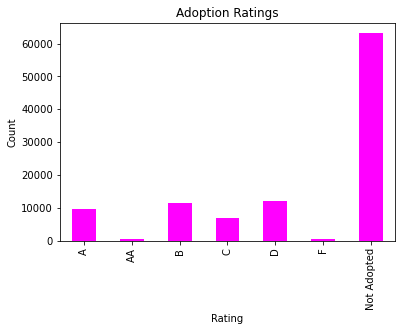

In [24]:
speed_data = adoption_speed["Adopt Rating"].count()

ax1 = speed_data.plot.bar(facecolor='magenta',title="Adoption Ratings")
ax1.set_xlabel("Rating")
ax1.set_ylabel("Count")

In [25]:
allanimal2_data["Outcome Type"] = allanimal2_data["Outcome Type"].replace("NaN", -1)

In [26]:
outcome = allanimal2_data.groupby("Outcome Type")

Text(0, 0.5, 'Count')

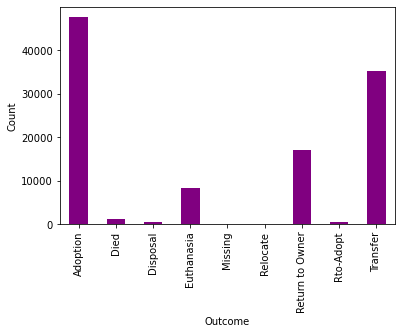

In [27]:
outcome_data = outcome["Outcome Type"].count()

ax1 = outcome_data.plot.bar(facecolor='purple')
ax1.set_xlabel("Outcome")
ax1.set_ylabel("Count")

Text(0, 0.5, 'Count')

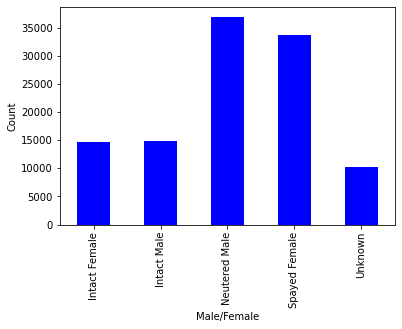

In [28]:
sex = allanimal2_data.groupby("Sex upon Outcome")
sex_data = sex["Sex upon Outcome"].count()

ax1 = sex_data.plot.bar(facecolor='blue')
ax1.set_xlabel("Male/Female")
ax1.set_ylabel("Count")

In [29]:
species_data = allanimal2_data.groupby(["Animal Type","Sex upon Outcome"]).size()
species_info = species_data.count()
species_info

22

<AxesSubplot:xlabel='Animal Type'>

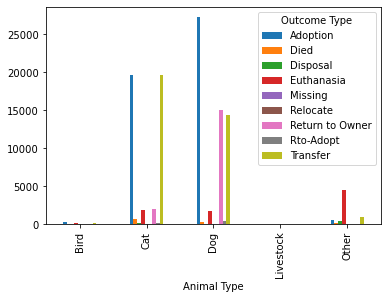

In [30]:
allanimal2_data.groupby(["Animal Type","Outcome Type"]).size().unstack().plot.bar()

<AxesSubplot:xlabel='Animal Type'>

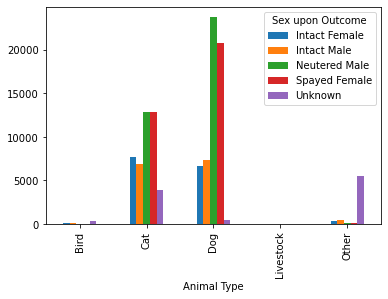

In [31]:
allanimal2_data.groupby(["Animal Type","Sex upon Outcome"]).size().unstack().plot.bar()

<AxesSubplot:xlabel='Animal Type'>

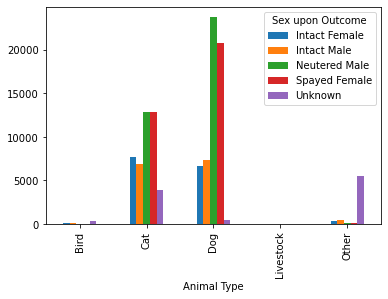

In [32]:
allanimal2_data.groupby(["Animal Type","Sex upon Outcome"]).size().unstack().plot.bar()

<AxesSubplot:xlabel='Outcome Type'>

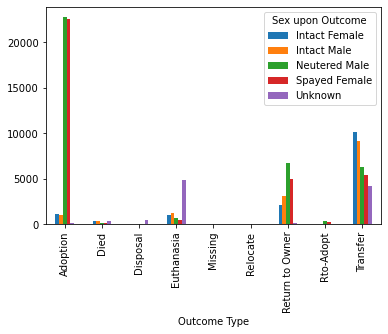

In [33]:
allanimal2_data.groupby(["Outcome Type","Sex upon Outcome"]).size().unstack().plot.bar()

In [34]:
start_date = '02/13/2021'
end_date = '2/20/2021'
mask = (allanimal2_data["DateTime"] > start_date) & (allanimal2_data["DateTime"] <= end_date)
animal_disaster = allanimal2_data.loc[mask]
animal_disaster.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating
2,829661,NaN,2021-02-19 17:23:00,9604 Carson Creek in Austin (TX),Stray,Normal,Cat,Intact Male,1 year,Domestic Shorthair,Orange Tabby,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
3,829660,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Carolina Dog,Yellow Brindle/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
4,829659,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Labrador Retriever,Black/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
5,829643,Frosty,2021-02-19 13:03:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,5 years,Labrador Retriever,White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
6,829642,NaN,2021-02-19 11:47:00,85Th Trinity Street in Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Chow Chow,Buff,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted


In [35]:
animal_disaster["DateTime"].count()

21

In [36]:
start_date = '05/01/2020'
end_date = '2/20/2021'
mask = (allanimal2_data["DateTime"] > start_date) & (allanimal2_data["DateTime"] <= end_date)
covid_animal = allanimal2_data.loc[mask]
covid_animal.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating
2,829661,NaN,2021-02-19 17:23:00,9604 Carson Creek in Austin (TX),Stray,Normal,Cat,Intact Male,1 year,Domestic Shorthair,Orange Tabby,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
3,829660,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Carolina Dog,Yellow Brindle/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
4,829659,NaN,2021-02-19 16:43:00,14204 Jacobson Road in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Labrador Retriever,Black/White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
5,829643,Frosty,2021-02-19 13:03:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,5 years,Labrador Retriever,White,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted
6,829642,NaN,2021-02-19 11:47:00,85Th Trinity Street in Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Chow Chow,Buff,NaT,NaN,NaN,NaN,NaN,NaN,NaT,New intake,Not Adopted


In [37]:
start_date = '05/01/2019'
end_date = '04/30/2020'
mask = (allanimal2_data["DateTime"] > start_date) & (allanimal2_data["DateTime"] <= end_date)
precovid_animal = allanimal2_data.loc[mask]
precovid_animal.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,shelter_time,shelter_days,Adopt Rating
6008,816841,*Ewok,2020-04-29 17:36:00,201 Lavaca in Austin (TX),Public Assist,Normal,Other,Intact Female,1 year,Rabbit Lh,Brown/Black,2020-05-26 07:33:00,4/29/2019,Adoption,Foster,Intact Female,1 year,26 days 13:57:00,26,C
6009,816834,NaN,2020-04-29 15:07:00,Austin (TX),Wildlife,Injured,Other,Unknown,1 year,Bat,Brown,2020-04-30 08:10:00,4/29/2019,Euthanasia,Rabies Risk,Unknown,1 year,0 days 17:03:00,0,Not Adopted
6011,816828,NaN,2020-04-29 11:57:00,9701 Dessau Road in Austin (TX),Wildlife,Sick,Other,Unknown,2 years,Skunk,Black/White,2020-04-30 08:08:00,4/29/2018,Euthanasia,Rabies Risk,Unknown,2 years,0 days 20:11:00,0,Not Adopted
6012,816827,*Pinky,2020-04-29 11:51:00,8701 Research Boulevard in Austin (TX),Stray,Medical,Dog,Intact Male,2 years,American Pit Bull Terrier Mix,White,2020-05-09 06:49:00,4/29/2018,Transfer,Partner,Intact Male,2 years,9 days 18:58:00,9,Not Adopted
6013,816825,NaN,2020-04-29 11:27:00,West Howard Lane And Mopac Service Road in Aus...,Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair,Orange Tabby,2020-06-03 08:50:00,3/29/2020,Adoption,Foster,Spayed Female,2 months,34 days 21:23:00,34,D


In [38]:
animal_disaster.to_csv("Austin_storm.csv", index=False)
covid_animal.to_csv("Covid_timeline.csv", index=False)
precovid_animal.to_csv("PreCovid_timeline.csv", index=False)

In [ ]:
#adopted2_animals = allanimal2_data[allanimal2_data["Outcome Type"]=="Adoption"]
#adopted2_animals.head()

In [ ]:
#type_cat = animal_data.loc[animal_data["Animal Type"] == "Cat"]
#type_dog = animal_data.loc[animal_data["Animal Type"] == "Dog"]
#type_bird = animal_data.loc[animal_data["Animal Type"] == "Bird"]
#type_livestock = animal_data.loc[animal_data["Animal Type"] == "Livestock"]
#type_other = animal_data.loc[animal_data["Animal Type"] == "Other"]

In [ ]:
#type_cats.to_csv("adopted_cats_clean.csv", index=False)
#type_dogs.to_csv("adopted_dogs_clean.csv", index=False)
#type_birds.to_csv("adopted_birds_clean.csv", index=False)
#type_livestocks.to_csv("adopted_livestock_clean.csv", index=False)
#type_others.to_csv("adopted_other_clean.csv", index=False)